# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.587  1  0.909 0.342 0.005   
                             age        0.208  1  0.322 0.571 0.002   
                             Kiel       2.764  1  4.279 0.040 0.022   
                             Magdeburg  5.438  1  8.420 0.004 0.042   
                             Sweden     9.436  1 14.608 0.000 0.071   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.459  1  0.483 0.488 0.003   
                             age        0.926  1  0.976 0.325 0.005   
                             Kiel       0.002  1  0.002 0.967 0.000   
                             Magdeburg  1.695  1  1.786 0.183 0.009   
                             Sweden    21.580  1 22.745 0.000 0.106   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.466  0.504    False  
                             age               0.244  0.706    False  
                             Kiel              1.399  0.102    False  
                             Magdeburg         2.382  0.016     True  
                             Sweden            3.747  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.312  0.640    False  
                             age               0.489  0.486    False  
                             Kiel              0.015  0.982    False  
                             Magdeburg         0.738  0.324    False  
                             Sweden            5.436  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.759  1  4.856 0.029 0.025   
                             age        0.011  1  0.070 0.792 0.000   
                             Kiel       0.403  1  2.580 0.110 0.013   
                             Magdeburg  0.875  1  5.596 0.019 0.028   
                             Sweden     2.273  1 14.540 0.000 0.071   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.942  1  0.481 0.489 0.003   
                             age        1.106  1  0.564 0.454 0.003   
                             Kiel      10.134  1  5.171 0.024 0.026   
                             Magdeburg 22.478  1 11.468 0.001 0.057   
                             Sweden     0.117  1  0.060 0.808 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.541  0.073    False  
                             age               0.101  0.865    False  
                             Kiel              0.959  0.213    False  
                             Magdeburg         1.721  0.052    False  
                             Sweden            3.733  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.311  0.629    False  
                             age               0.343  0.598    False  
                             Kiel              1.618  0.063    False  
                             Magdeburg         3.066  0.004     True  
                             Sweden            0.093  0.877    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.342         0.466  0.504    False   
                             age       0.571         0.244  0.706    False   
                             Kiel      0.040         1.399  0.102    False   
                             Magdeburg 0.004         2.382  0.016     True   
                             Sweden    0.000         3.747  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.488         0.312  0.640    False   
                             age       0.325         0.489  0.486    False   
                             Kiel      0.967         0.015  0.982    False   
                             Magdeburg 0.183         0.738  0.324    False   
                             Sweden    0.000         5.436  0.000     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.029         1.541  0.073    False  
                             age       0.792         0.101  0.865    False  
                             Kiel      0.110         0.959  0.213    False  
                             Magdeburg 0.019         1.721  0.052    False  
                             Sweden    0.000         3.733  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.489         0.311  0.629    False  
                             age       0.454         0.343  0.598    False  
                             Kiel      0.024         1.618  0.063    False  
                             Magdeburg 0.001         3.066  0.004     True  
                             Sweden    0.808         0.093  0.877    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.259         2.489     0.335     0.245         2.740     0.312
std       0.302         5.357     0.330     0.298         5.183     0.325
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.337     0.015     0.002         0.356     0.008
50%       0.118         0.926     0.237     0.096         1.018     0.192
75%       0.460         2.422     0.614     0.441         2.702     0.588
max       1.000       147.940     1.000     1.000        86.644     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.342         0.466   
A0A024R0T9;K7ER74;P02655                           AD     0.050         1.300   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.033         1.478   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.597         0.224   
A0A075B6H7                                         AD     0.159         0.798   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.014         1.868   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.129         0.890   
S4R3U6                                             AD     0.488         0.312   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.504    False   
A0A024R0T9;K7ER74;P02655                           AD      0.121    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.088    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.727    False   
A0A075B6H7                                         AD      0.293    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.314    False   
Q9Y6X5                                             AD      0.043     True   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.253    False   
S4R3U6                                             AD      0.640    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.029         1.541   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.470   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.458         0.339   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.296         0.529   
A0A075B6H7                                         AD     0.742         0.130   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.063         1.199   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.550         0.260   
S4R3U6                                             AD     0.489         0.311   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.073    False  
A0A024R0T9;K7ER74;P02655                           AD      0.083    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.601    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.445    False  
A0A075B6H7                                         AD      0.828    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.254         1.412     0.334     0.249         1.487     0.322
std       0.292         1.643     0.317     0.290         1.774     0.315
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.012         0.358     0.038     0.010         0.354     0.030
50%       0.119         0.924     0.238     0.109         0.962     0.212
75%       0.438         1.934     0.595     0.443         2.019     0.589
max       0.999        23.699     0.999     1.000        25.229     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1031,994


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.342         0.466  0.504   
A0A024R0T9;K7ER74;P02655                           0.050         1.300  0.121   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.033         1.478  0.088   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.597         0.224  0.727   
A0A075B6H7                                         0.159         0.798  0.293   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.314   
Q9Y6X5                                             0.014         1.868  0.043   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.129         0.890  0.253   
S4R3U6                                             0.488         0.312  0.640   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.029   
A0A024R0T9;K7ER74;P02655                              False 0.034   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.458   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.296   
A0A075B6H7                                            False 0.742   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                 True 0.063   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.550   
S4R3U6                                                False 0.489   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.541  0.073   
A0A024R0T9;K7ER74;P02655                                   1.470  0.083   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.339  0.601   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.529  0.445   
A0A075B6H7                                                 0.130  0.828   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     1.199  0.137   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.260  0.678   
S4R3U6                                                     0.311  0.629   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    964
PI (yes) - QRILC (yes)   360
PI (no)  - QRILC (yes)    67
PI (yes) - QRILC (no)     30
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.020         1.690  0.060    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.007         2.173  0.024     True   
A0A087WWT2;Q9NPD7                     0.027         1.561  0.076    False   
A0A087WXB8;Q9Y274                     0.001         3.257  0.003     True   
A0A087X1G7;A0A0B4J1S4;O60613          0.040         1.398  0.102    False   
...                                     ...           ...    ...      ...   
Q9NZ94;Q9NZ94-2;Q9NZ94-3              0.570         0.244  0.705    False   
Q9P0K9                                0.023         1.638  0.066    False   
Q9UNW1                                0.009         2.052  0.031     True   
Q9UQ52                                0.134         0.873  0.260    False   
Q9Y6X5                                0.014         1.868  0.043     True   

                                      QRILC                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.002         2.722  0.008     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.148         0.831  0.266    False   
A0A087WWT2;Q9NPD7                     0.015         1.825  0.043     True   
A0A087WXB8;Q9Y274                     0.182         0.740  0.311    False   
A0A087X1G7;A0A0B4J1S4;O60613          0.012         1.907  0.037     True   
...                                     ...           ...    ...      ...   
Q9NZ94;Q9NZ94-2;Q9NZ94-3              0.005         2.320  0.017     True   
Q9P0K9                                0.010         1.993  0.031     True   
Q9UNW1                                0.152         0.819  0.272    False   
Q9UQ52                                0.006         2.259  0.019     True   
Q9Y6X5                                0.063         1.199  0.137    False   

                                           data  
                                      frequency  
protein groups                                   
A0A075B6I0                                  194  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
A0A087WWT2;Q9NPD7                           193  
A0A087WXB8;Q9Y274                            89  
A0A087X1G7;A0A0B4J1S4;O60613                184  
...                                         ...  
Q9NZ94;Q9NZ94-2;Q9NZ94-3                    115  
Q9P0K9                                      192  
Q9UNW1                                      171  
Q9UQ52                                      188  
Q9Y6X5                                      173  

[97 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.504,0.073,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.121,0.083,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.088,0.601,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.727,0.445,196,PI (no) - QRILC (no)
A0A075B6H7,0.293,0.828,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.314,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.043,0.137,173,PI (yes) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
J3KSJ8;Q9UD71;Q9UD71-2,0.963,0.001,51,PI (no) - QRILC (yes),0.962
Q9NY15,0.996,0.038,135,PI (no) - QRILC (yes),0.958
A0A1W2PQ94;B4DS77;B4DS77-2;B4DS77-3,0.873,0.014,69,PI (no) - QRILC (yes),0.859
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.695,0.000,86,PI (no) - QRILC (yes),0.695
Q9NZ94;Q9NZ94-2;Q9NZ94-3,0.705,0.017,115,PI (no) - QRILC (yes),0.689
...,...,...,...,...,...
F5H1U3;Q02790,0.054,0.044,166,PI (no) - QRILC (yes),0.010
P26572,0.052,0.043,194,PI (no) - QRILC (yes),0.009
O75781;O75781-2,0.057,0.049,126,PI (no) - QRILC (yes),0.008


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


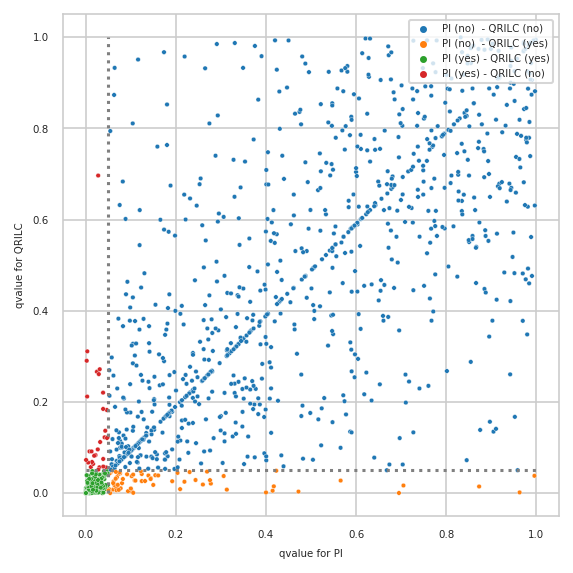

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


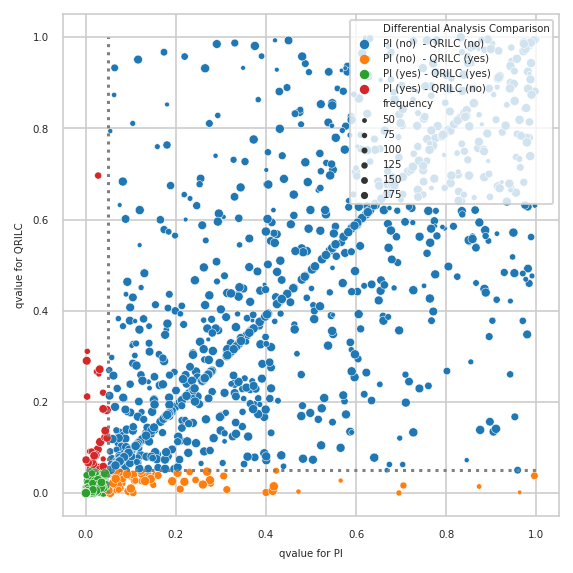

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out